## Section 1: Data Preprocessing

### Import and load the dataset

In [5]:
#Load the necessary libraries
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [6]:
uploaded = files.upload()

Saving IncomeAnalysisData.csv to IncomeAnalysisData.csv


In [7]:
#Read and display the top 5 rows of the dataset
data = pd.read_csv("IncomeAnalysisData.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Exploration

In [8]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [9]:
#Print the number of rows and columns in the dataset
print(f"Number of rows in the dataset: {data.shape[0]}")
print(f"Number of columns in the dataset: {data.shape[1]}")

Number of rows in the dataset: 32561
Number of columns in the dataset: 15


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
#Print the max employee age
data.iloc[data["age"].idxmax()]

age                            90
 workclass                Private
 fnlwgt                     51744
 education                HS-grad
 education-num                  9
 marital-status     Never-married
 occupation         Other-service
 relationship       Not-in-family
 race                       Black
 sex                         Male
 capital-gain                   0
 capital-loss                2206
 hours-per-week                40
 native-country     United-States
 income                     <=50K
Name: 222, dtype: object

In [13]:
#Print min employee age
data.iloc[data["age"].idxmin()]

age                            17
 workclass                      ?
 fnlwgt                    304873
 education                   10th
 education-num                  6
 marital-status     Never-married
 occupation                     ?
 relationship           Own-child
 race                       White
 sex                       Female
 capital-gain               34095
 capital-loss                   0
 hours-per-week                32
 native-country     United-States
 income                     <=50K
Name: 106, dtype: object

Data Visualization

### Data Visualization

In [14]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [15]:
#Different workclasses within the income dataset
data[' workclass'].value_counts().sort_values(ascending = False)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

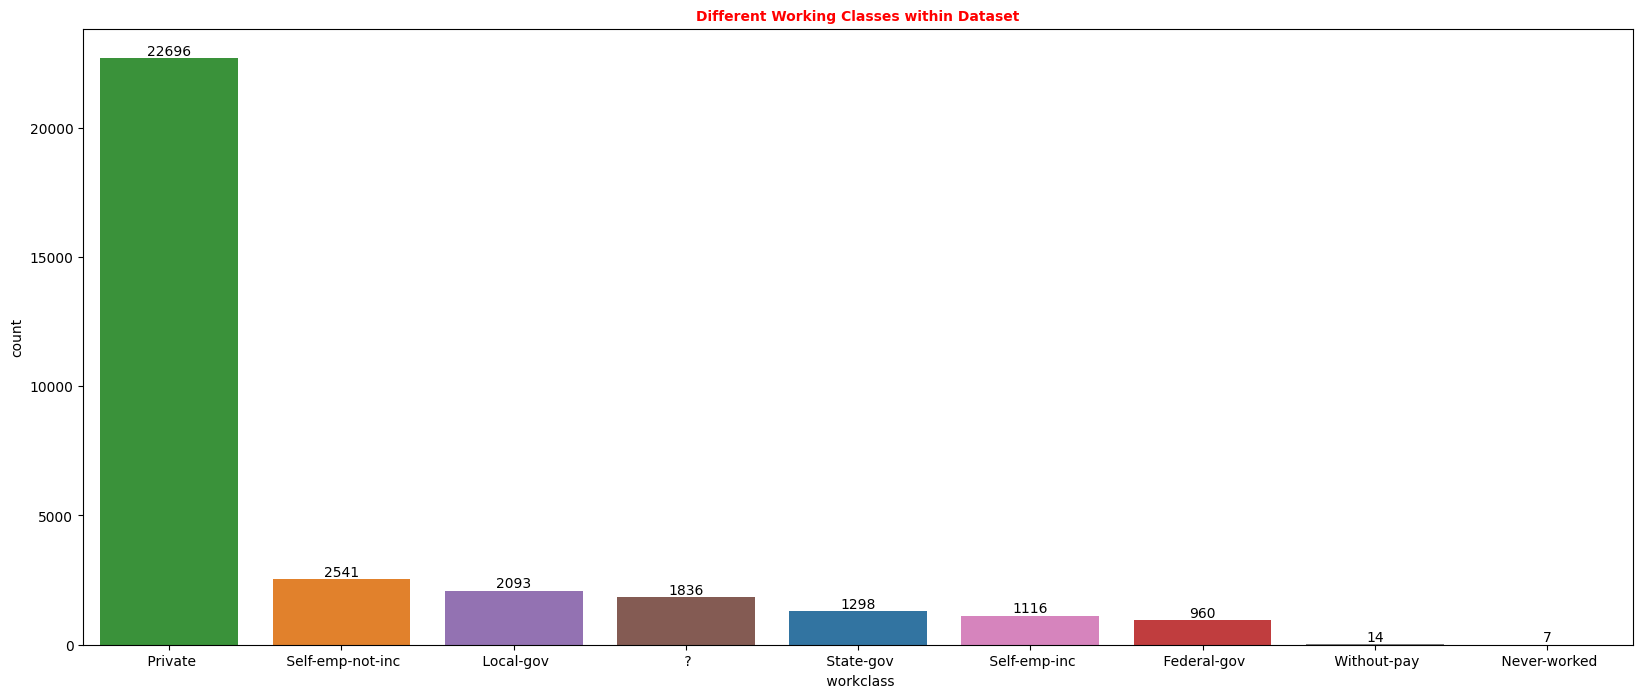

In [16]:
#Plot bar graph for the different workclasses
plt.figure(figsize = (20,8))
ax = sns.countplot(data = data, x =" workclass", hue = " workclass", order =data[' workclass'].value_counts(ascending = False).index)
for label in ax.containers:
  plt.bar_label(label)
plt.title("Different Working Classes within Dataset", fontsize = 20, font = 'sans serif', color = 'red', weight = 'bold')
plt.show()

In [17]:
#The two income classes within the dataset
data[' income'].value_counts().sort_values(ascending = False)

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

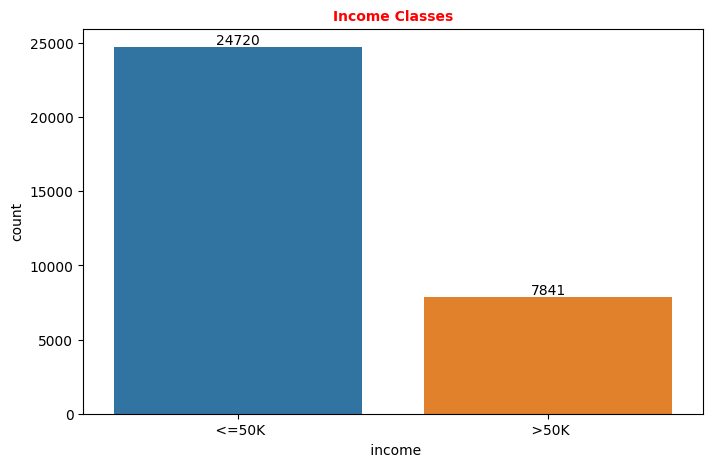

In [18]:
#Plot the different income classes - bar graph
plt.figure(figsize = (8,5))
ax = sns.countplot(data = data, x = " income", hue = " income")
for label in ax.containers:
  plt.bar_label(label)
plt.title("Income Classes", fontsize = 12, font = 'sans serif', weight = 'bold', color = 'red')
plt.show()

In [19]:
#Different education levels within the dataset
data[' education'].value_counts().sort_values(ascending = False)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

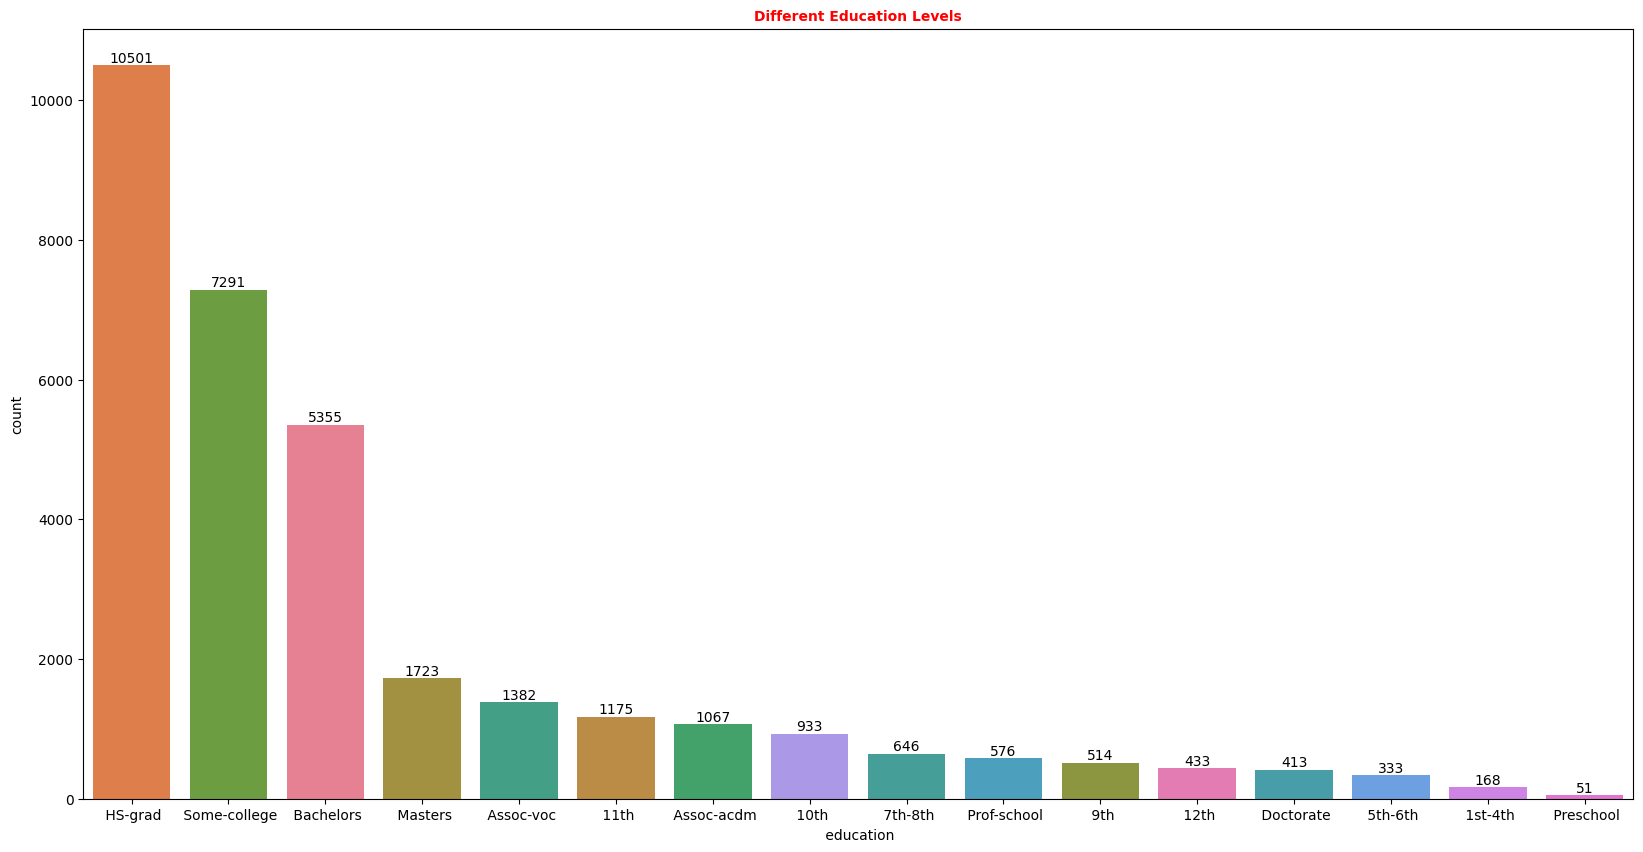

In [20]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = data, x =" education", hue = " education", order =data[' education'].value_counts(ascending = False).index)
for label in ax.containers:
  plt.bar_label(label)
plt.title("Different Education Levels", fontsize = 12, font = 'sans serif', weight = 'bold', color ='red')
plt.show()

In [21]:
label_one = data[" sex"].unique()

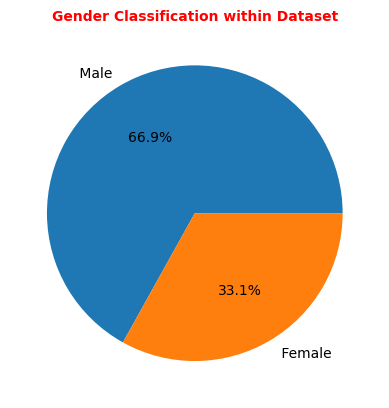

In [22]:
#Pie Chart for Gender
plt.pie(x = data[" sex"].value_counts(), labels = label_one, autopct = '%1.1f%%')
plt.title("Gender Classification within Dataset", fontsize = 12, font = 'sans serif', weight = 'bold', color = 'red')
plt.show()

In [23]:
label_two = data[" marital-status"].unique()
label_two

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

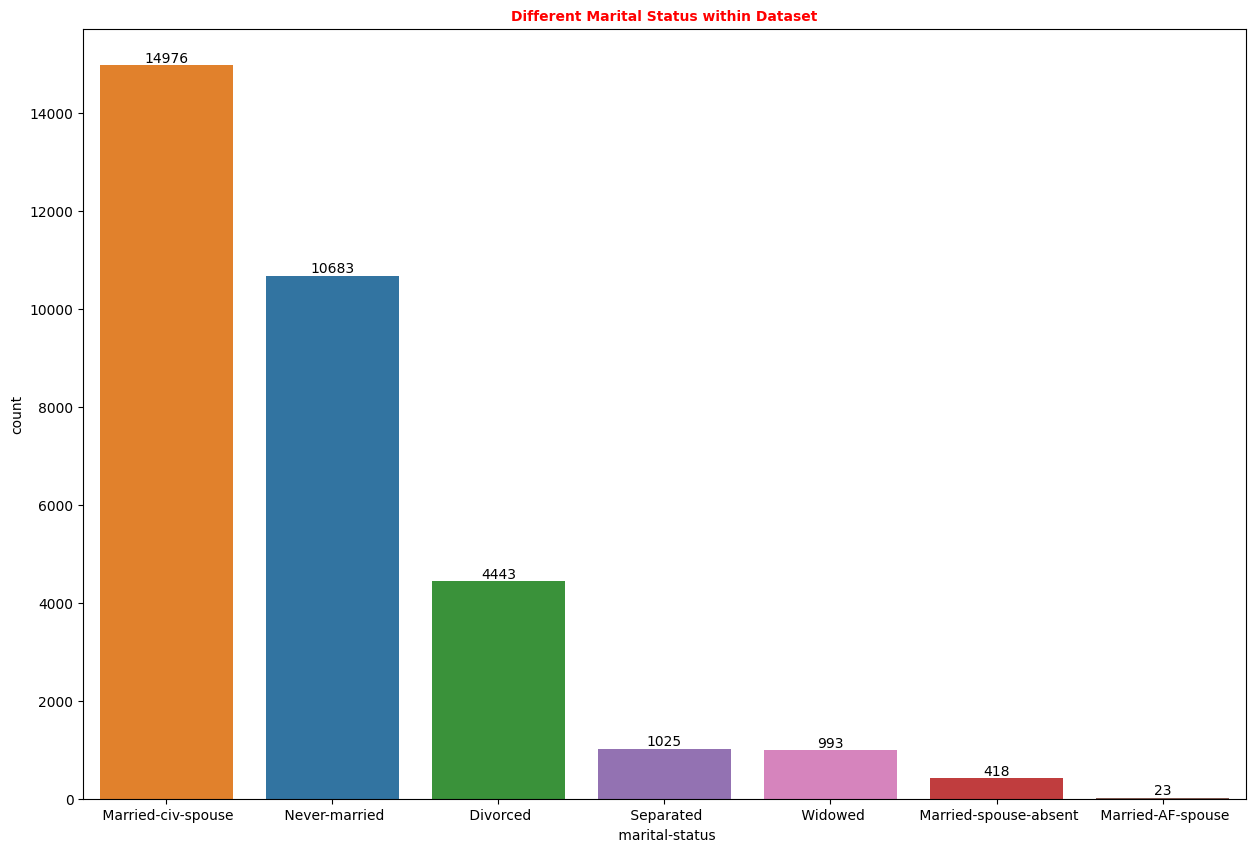

In [24]:
#Bar Chart for the different marital status
plt.figure(figsize = (15,10))
ax = sns.countplot(data = data, x =" marital-status", hue = " marital-status", order =data[' marital-status'].value_counts().index)
for label in ax.containers:
  plt.bar_label(label)
plt.title("Different Marital Status within Dataset", fontsize= 12, font = 'sans serif', color = 'red', weight ='bold')
plt.show()

### Restructure the dataset

Machine Learning

In [25]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [26]:
#taking only the needed columns and editing the column name
data = data[['age', ' workclass', ' education',' marital-status', ' occupation', ' hours-per-week', ' native-country',' income']]
data.columns = [['age', 'workclass', 'education','marital-status', 'occupation', 'hours-per-week', 'native-country','income']]

In [27]:
data.head()

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,40,Cuba,<=50K


### Dealing with missing values

In [28]:
#Checking for null values
data.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Dealing with duplicates

In [29]:
#Checking for duplicated values
data.duplicated().sum()

7226

In [30]:
#Dropping the duplicates
data.drop_duplicates(inplace = True)

In [31]:
data.shape

(25335, 8)

In [32]:
#Verification for the duplicates
data.duplicated().sum()

0

In [33]:
data.columns

MultiIndex([(           'age',),
            (     'workclass',),
            (     'education',),
            ('marital-status',),
            (    'occupation',),
            ('hours-per-week',),
            ('native-country',),
            (        'income',)],
           )

### Dealing with categorical data

In [34]:
labelencoder = LabelEncoder()
sc = StandardScaler()

In [35]:
data["native-country"] = labelencoder.fit_transform(data["native-country"])
data["workclass"] = labelencoder.fit_transform(data["workclass"])
data["education"] = labelencoder.fit_transform(data["education"])
data["marital-status"] = labelencoder.fit_transform(data["marital-status"])
data["occupation"] = labelencoder.fit_transform(data["occupation"])
data["income"] = labelencoder.fit_transform(data["income"])

In [36]:
data.head()

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
0,39,7,9,4,1,40,39,0
1,50,6,9,2,4,13,39,0
2,38,4,11,0,6,40,39,0
3,53,4,1,2,6,40,39,0
4,28,4,9,2,10,40,5,0


### Correlation matrix and heatmap

In [46]:
#Correlation Matrix
corr = data.corr()
corr

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
age,1.000000,-0.022275,0.010765,-0.183037,-0.037227,0.002684,0.035718,0.183826
workclass,-0.022275,1.000000,0.035124,-0.052890,0.250476,0.139054,-0.002807,0.046919
education,0.010765,0.035124,1.000000,-0.049838,0.004765,0.058838,0.052684,0.110741
marital-status,-0.183037,-0.052890,-0.049838,1.000000,-0.016258,-0.166395,-0.038896,-0.172918
occupation,-0.037227,0.250476,0.004765,-0.016258,1.000000,0.092576,-0.001294,0.073261
hours-per-week,0.002684,0.139054,0.058838,-0.166395,0.092576,1.000000,0.009047,0.217516
native-country,0.035718,-0.002807,0.052684,-0.038896,-0.001294,0.009047,1.000000,0.027702
income,0.183826,0.046919,0.110741,-0.172918,0.073261,0.217516,0.027702,1.000000


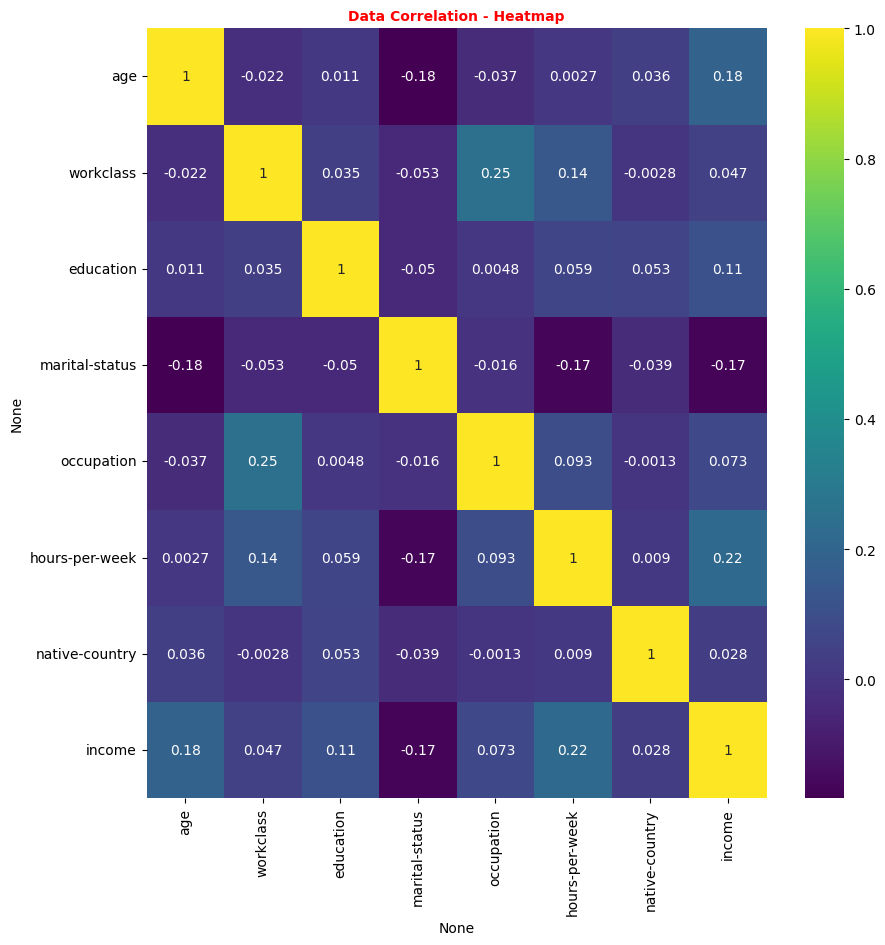

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), annot = True, cmap='viridis')
plt.title("Data Correlation - Heatmap", color ='red', fontsize =12, font = 'sans serif', weight ='bold')
plt.show()

### Splitting the dataset into train and test sets

In [48]:
#Splitting the dataset into dependent and independent variables
x = data[['age', 'workclass', 'education','marital-status', 'occupation', 'hours-per-week', 'native-country']]
y = data[['income']]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

### Feature Scaling

In [50]:
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

## Section 2: Building the Model

In [51]:
#Function to calculate the accuracy score of the models
def modelresults(predictions):
  print(f"Accuracy score for the model is : {accuracy_score(y_test,predictions)}")

### 1) Logistic Regression Model

In [52]:
#Logistic Regression
log = LogisticRegression()
log.fit(scaled_x_train, y_train)

LogisticRegression()

In [53]:
log_predictions = log.predict(scaled_x_test)
modelresults(log_predictions)

Accuracy score for the model is : 0.7333728044207618


### 2) KNN Classifier Model

In [54]:
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps = [("knn", knn)])
param_grid = {"knn__n_neighbors" : k_values}
cv_classifier = GridSearchCV(pipe, param_grid, cv = 5, scoring = "accuracy")

cv_classifier.fit(scaled_x_train, y_train.values.ravel())
print(cv_classifier.best_params_)

{'knn__n_neighbors': 24}


In [55]:
gridknn_predictions = cv_classifier.predict(scaled_x_test)
modelresults(gridknn_predictions)

Accuracy score for the model is : 0.7959344779948687


### 3) Support Vector Machine Model

In [56]:
#Support Vector Model
svm = SVC()
param_grid_svr = {"C" : [0.1, 0.5, 1, 1.5, 2], "kernel" : ["linear", "rbf","poly"]}
gridsvr = GridSearchCV(svm , param_grid_svr)
gridsvr.fit(scaled_x_train, y_train.values.ravel())
#search for using numpy - to remove the thread of errors

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 1.5, 2],
                         'kernel': ['linear', 'rbf', 'poly']})

In [57]:
predictions_svr = gridsvr.predict(scaled_x_test)
modelresults(predictions_svr)

Accuracy score for the model is : 0.7908032366291692


### 4) Random Forest Algorithm Model

In [60]:
#Random Forest Algorithm
rfr_model = RandomForestClassifier()
n_estimators = [50, 75, 100]
max_features = [2, 3, 4, 5]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfr = {"n_estimators": n_estimators, "max_features" : max_features,
                  "bootstrap" : bootstrap, "oob_score" : oob_score }
grid_rfr = GridSearchCV(rfr_model, param_grid_rfr)
grid_rfr.fit(scaled_x_train, y_train.values.ravel())
print(grid_rfr.best_params_)

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}


In [61]:
predrfr = grid_rfr.predict(scaled_x_test)
modelresults(predrfr)

Accuracy score for the model is : 0.7694888494178015


## Section 3: Predicting outcome

In [62]:
print(x.describe())

                age     workclass     education marital-status    occupation  \
count  25335.000000  25335.000000  25335.000000   25335.000000  25335.000000   
mean      40.228932      3.894494     10.075350       2.548332      6.733097   
std       13.742245      1.544822      3.972299       1.546579      4.240394   
min       17.000000      0.000000      0.000000       0.000000      0.000000   
25%       29.000000      4.000000      9.000000       2.000000      3.000000   
50%       39.000000      4.000000     11.000000       2.000000      7.000000   
75%       49.500000      4.000000     12.000000       4.000000     10.000000   
max       90.000000      8.000000     15.000000       6.000000     14.000000   

      hours-per-week native-country  
count   25335.000000   25335.000000  
mean       40.927768      36.104480  
std        13.281121       8.719442  
min         1.000000       0.000000  
25%        38.000000      39.000000  
50%        40.000000      39.000000  
75%        48

In [63]:
#Or another method - for new customer
col = 1
for i in x.columns:
  mean = data[i].mean()
  print("The mean of each column {} is {}:".format(col,mean))
  col = col+1

The mean of each column 1 is 40.22893230708506:
The mean of each column 2 is 3.89449378330373:
The mean of each column 3 is 10.075350305900928:
The mean of each column 4 is 2.5483323465561476:
The mean of each column 5 is 6.733096506808763:
The mean of each column 6 is 40.92776791000592:
The mean of each column 7 is 36.10447996842313:


In [64]:
newdata = np.array([40,4,10,3,7,41,36])

In [65]:
#When we fitted the char to num values 1 = not cancelled and 0 = cancelled booking
def results(customer):
  predictions = cv_classifier.predict(sc.transform(customer.reshape(1,-1)))
  if predictions ==0:
    return "below or equal to 50k"
  else:
    return "more than 50k"

print("Income prediction is {} according to the K Nearest Neighbours Model".format(results(newdata)))

Income prediction is below or equal to 50k according to the K Nearest Neighbours Model
